## Importing and Exploring Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


This dataset contain 31647 rows and 18 columns. 'Subscribed' is our target variable. This is a Binary Classification Problem as we can see our target variable has just 2 values.

In [3]:
# Checking for data type
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see that some of our features including Target variable are in object datatype.

In [4]:
# Checking for missing values
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

This dataset does not contain any missing values.

In [5]:
# Dropping id and contact column as they are irrelevent to the training
df.drop(['ID','contact'], axis=1, inplace=True)

In [6]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
23268,53,blue-collar,married,primary,no,0,no,no,21,aug,195,1,-1,0,unknown,no
394,30,management,single,tertiary,no,54,yes,yes,19,nov,192,1,177,3,failure,no
10063,37,admin.,single,secondary,no,-117,no,yes,7,jul,106,1,-1,0,unknown,no
8210,55,blue-collar,married,secondary,no,1328,yes,no,15,may,100,1,-1,0,unknown,no
10669,56,blue-collar,married,primary,no,351,yes,no,12,may,179,4,-1,0,unknown,no


We have successfully removed id and contact columns.

In [7]:
df.shape

(31647, 16)

Now, we have 31647 rows and 16 columns. 

In [8]:
# Converting 'subscribed' to a binary variable
df['subscribed'] = df['subscribed'].apply(lambda x: 1 if x == 'yes' else 0)

In [9]:
df['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

## Data Visulization

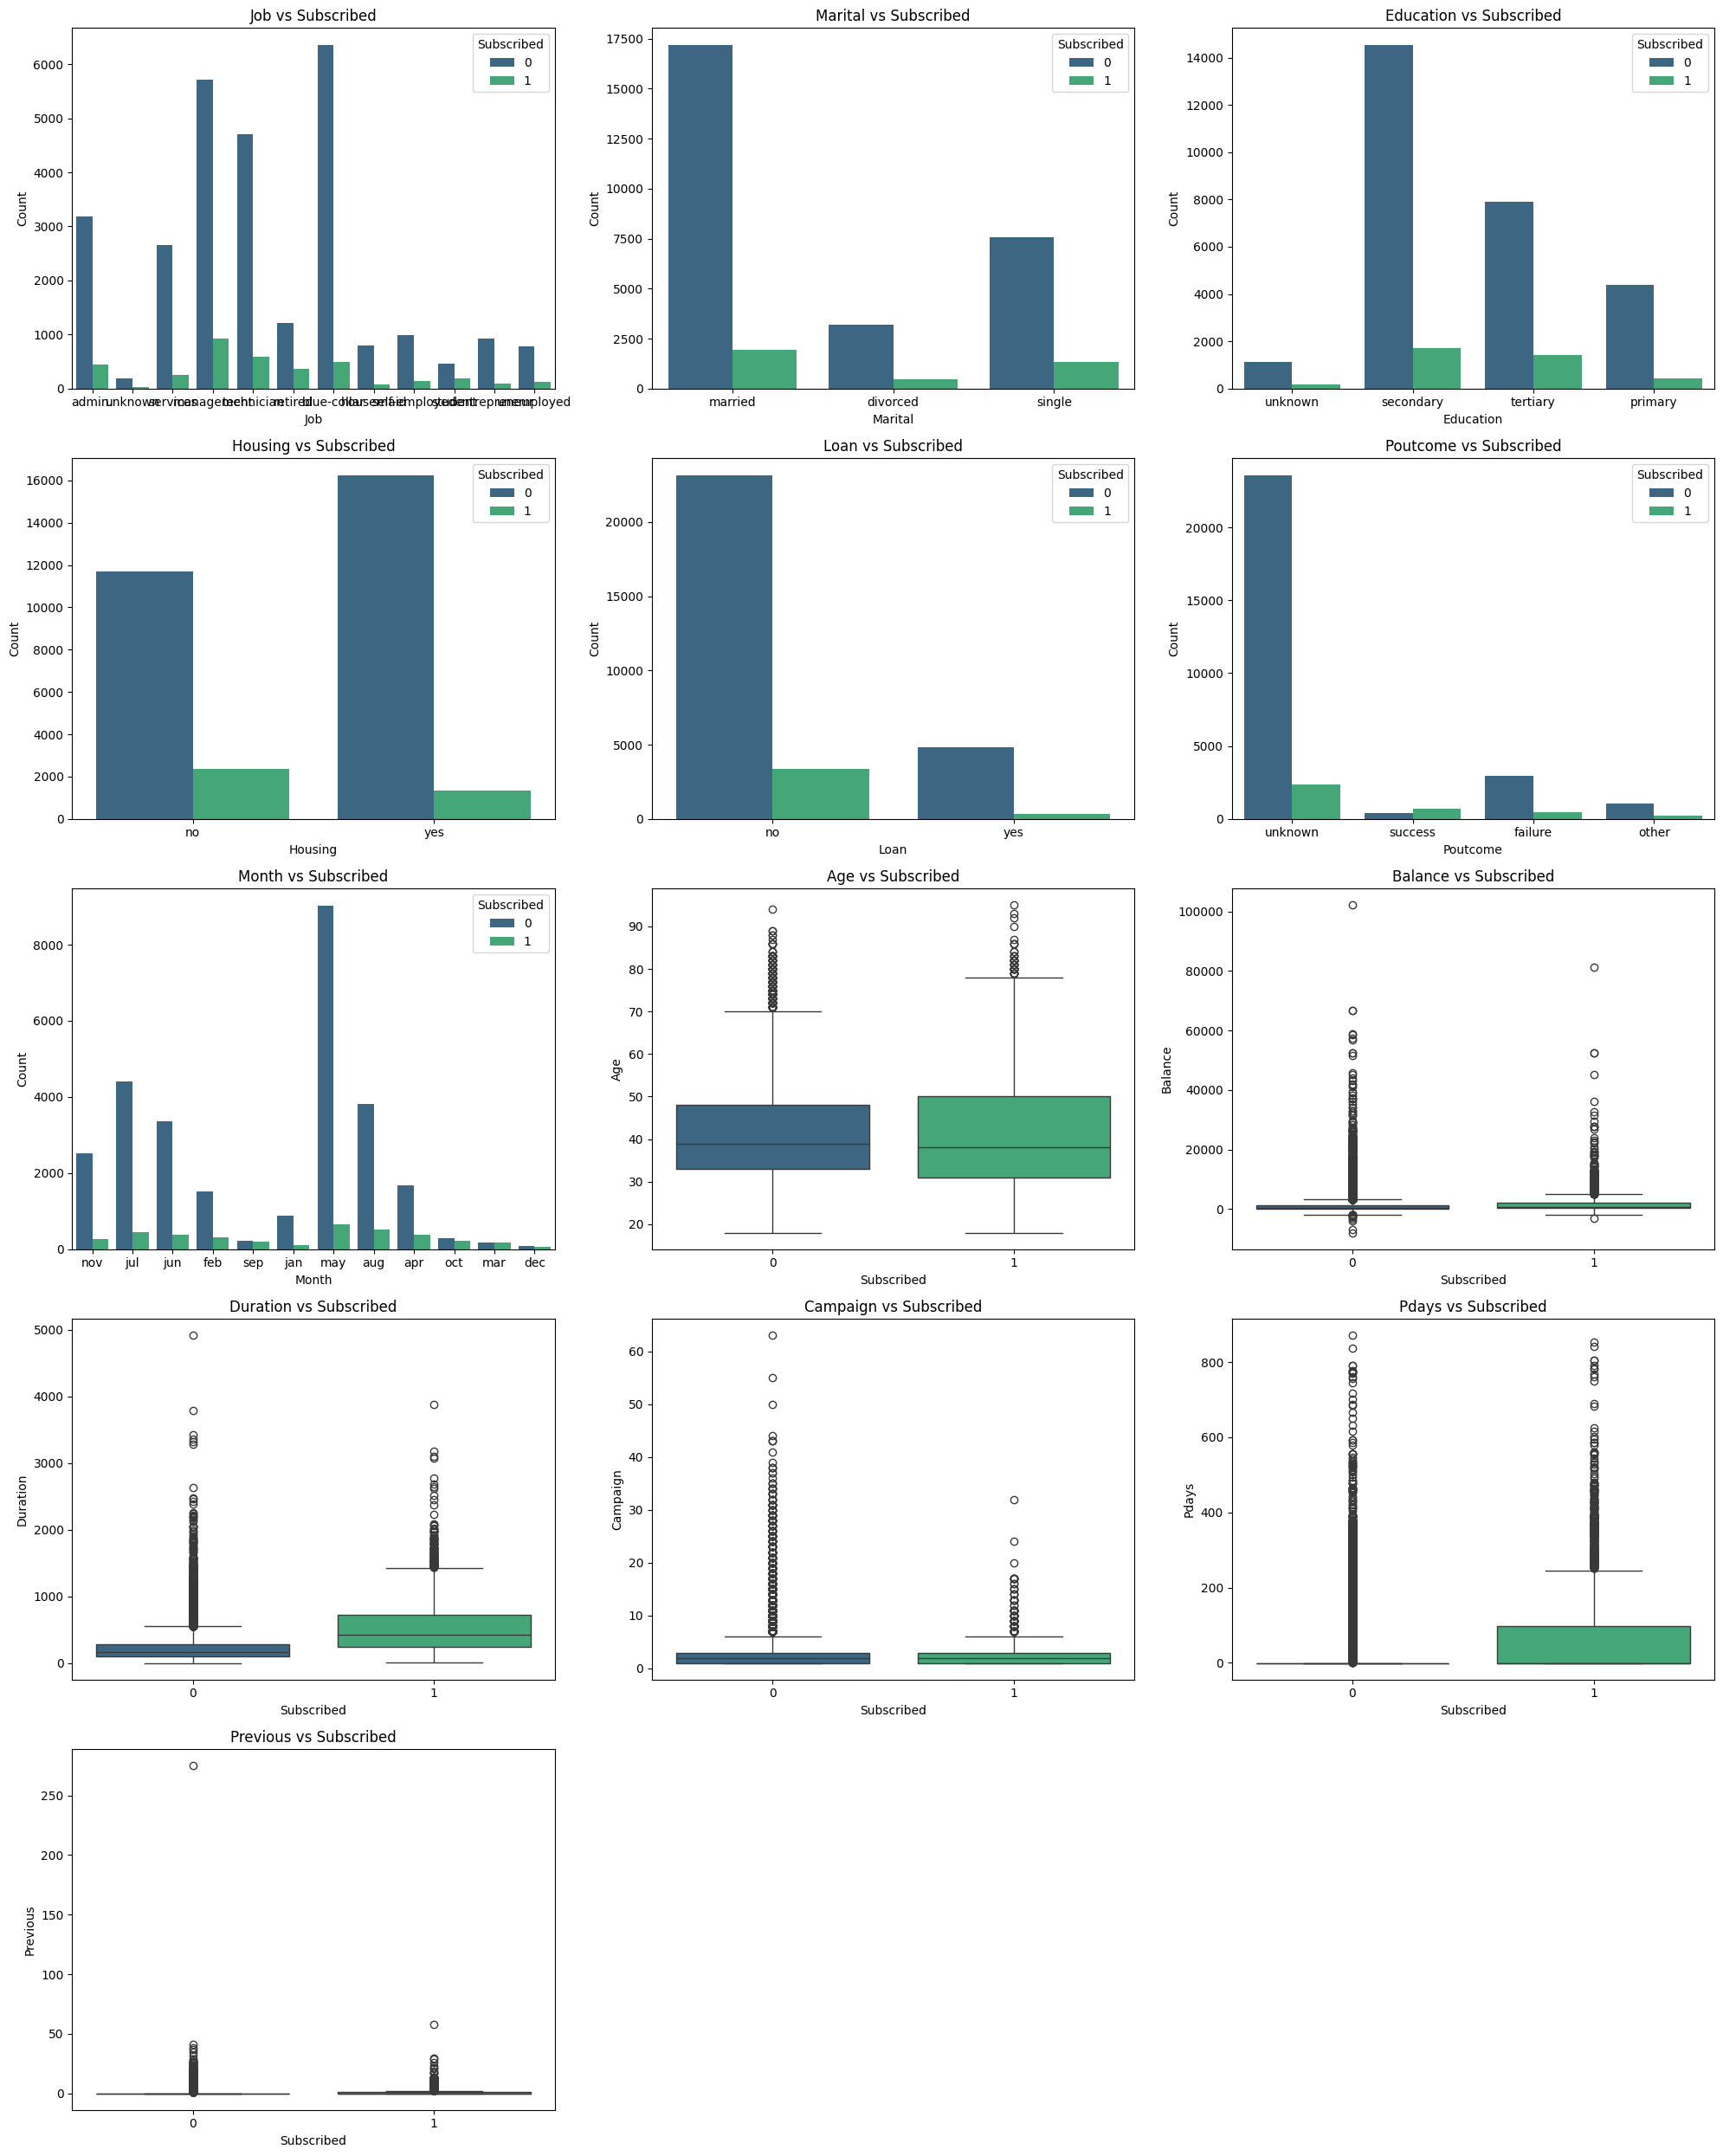

In [10]:
import math
# Categorical and numerical variables
categorical_vars = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome', 'month']
numerical_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Combining all variables and calculating the total number of plots needed
all_vars = categorical_vars + numerical_vars
num_vars = len(all_vars)

# Calculating the number of rows and columns for the subplots
cols = 3
rows = math.ceil(num_vars / cols)

# Creating a figure with the required number of subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Creating bar plots for categorical variables and box plots for numerical variables
for i, var in enumerate(all_vars):
    if var in categorical_vars:
        sns.countplot(x=var, hue='subscribed', data=df, palette='viridis', ax=axes[i])
        axes[i].set_title(f'{var.capitalize()} vs Subscribed')
        axes[i].set_xlabel(var.capitalize())
        axes[i].set_ylabel('Count')
        axes[i].legend(title='Subscribed', loc='upper right')
    else:
        sns.boxplot(x='subscribed', y=var, data=df, palette='viridis', ax=axes[i])
        axes[i].set_title(f'{var.capitalize()} vs Subscribed')
        axes[i].set_xlabel('Subscribed')
        axes[i].set_ylabel(var.capitalize())

# Hiding any remaining empty subplots
for i in range(num_vars, len(axes)):
    fig.delaxes(axes[i])

# Adjusting layout
plt.tight_layout()
plt.show()

In [11]:
# Statisical Summary
df.describe()

,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [12]:
# Checking the distribution of categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',  'poutcome']
for column in categorical_columns:
    print(df[column].value_counts())
    print("\n")


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


yes    17584
no     14063
Name: housing, dtype: int64


no     26516
yes     5131
Name: loan, dtype: int64


may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64




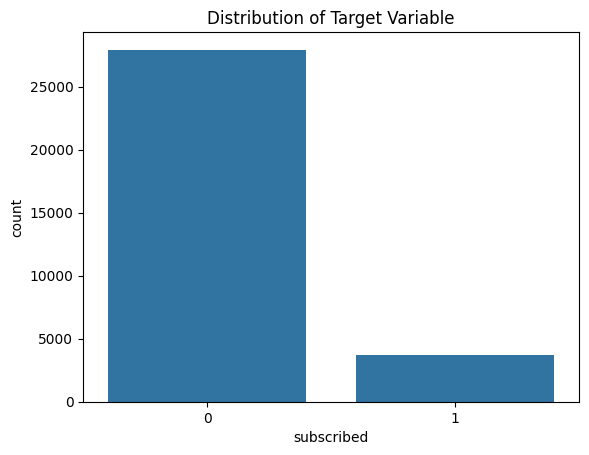

In [13]:
# Plotting the distribution of the target variable
sns.countplot(x='subscribed', data=df)
plt.title('Distribution of Target Variable')
plt.show()

we can see that people who did not subscribed are way higher than people who subscribed.

### Label Encoding

In [14]:
import sklearn
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']

# Initializing LabelEncoder
le = LabelEncoder()

# Applying LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print("DataFrame after label encoding:")
print(df)

DataFrame after label encoding:
       age  job  marital  education  default  balance  housing  loan  day  \
0       56    0        1          3        0     1933        0     0   19   
1       31   11        1          1        0        3        0     0   20   
2       27    7        1          1        0      891        1     0   18   
3       57    4        0          2        0     3287        0     0   22   
4       31    9        1          1        0      119        1     0    4   
...    ...  ...      ...        ...      ...      ...      ...   ...  ...   
31642   29    4        2          2        0        0        1     0   12   
31643   53    4        0          2        0      380        0     1    5   
31644   32    4        2          2        0      312        0     0    7   
31645   57    9        1          1        0      225        1     0   15   
31646   55    4        0          1        0      204        1     0   11   

       month  duration  campaign  pdays  pr

We have successfully converted categorical columns into numeric columns with the help of Label Encoder.

### Balancing Dataset

In [15]:
# Balancing Dataset using Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

x = df.drop(columns='subscribed')  
y = df['subscribed']

# Random Undersampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)
print("Random Undersampling class distribution:", pd.Series(y_rus).value_counts())

Random Undersampling class distribution: 0    3715
1    3715
Name: subscribed, dtype: int64


In [16]:
x_rus.shape

(7430, 15)

In [17]:
y_rus.shape

(7430,)

In [20]:
# Combining x_rus and y_rus into a single DataFrame
df_rus = pd.concat([x_rus, y_rus], axis=1)

In [21]:
df_rus.sample(2)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
5754,52,10,1,1,0,94,0,0,30,0,244,1,-1,0,3,1
2501,32,10,1,1,0,365,1,0,30,4,210,3,-1,0,3,0


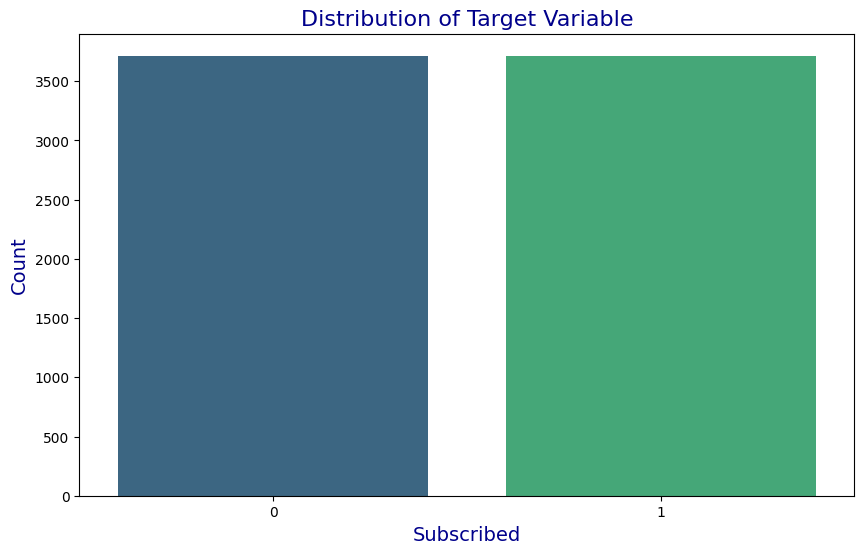

In [22]:
# Again Plotting the distribution of the target variable after applying undersampling
plt.figure(figsize=(10, 6))
sns.countplot(x='subscribed', data=df_rus, palette='viridis')
plt.title('Distribution of Target Variable', fontsize=16, color='darkblue')
plt.xlabel('Subscribed', fontsize=14, color='darkblue')
plt.ylabel('Count', fontsize=14, color='darkblue')
plt.show()

Now , we can see that our dataset has become balanced.

### Data Scaling

In [23]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
x = df_rus.drop(columns='subscribed')
Y = df_rus['subscribed']

# Initializing StandardScaler
scaler = StandardScaler()

# Fitting and transforming the features
X = scaler.fit_transform(x)


In [24]:
X

array([[ 0.90367144, -0.1499311 , -0.32393963, ..., -0.48520659,
        -0.37547313,  0.52453563],
       [ 0.31738127, -0.1499311 , -1.91895055, ..., -0.48520659,
        -0.37547313,  0.52453563],
       [ 1.40620587,  0.16123876, -0.32393963, ..., -0.48520659,
        -0.37547313,  0.52453563],
       ...,
       [-0.6876876 , -1.08344068, -0.32393963, ..., -0.48520659,
        -0.37547313,  0.52453563],
       [ 0.98742718, -0.1499311 , -1.91895055, ..., -0.48520659,
        -0.37547313,  0.52453563],
       [ 1.15493865, -0.1499311 , -1.91895055, ..., -0.48520659,
        -0.37547313,  0.52453563]])

In [25]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
7425    1
7426    1
7427    1
7428    1
7429    1
Name: subscribed, Length: 7430, dtype: int64

## Model Training and Evaluation

### Logistic Regression

In [26]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)  
logreg_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.778600269179004
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       757
           1       0.78      0.76      0.77       729

    accuracy                           0.78      1486
   macro avg       0.78      0.78      0.78      1486
weighted avg       0.78      0.78      0.78      1486



### Decision Trees

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7705248990578735
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       757
           1       0.76      0.78      0.77       729

    accuracy                           0.77      1486
   macro avg       0.77      0.77      0.77      1486
weighted avg       0.77      0.77      0.77      1486



### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8324360699865411
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       757
           1       0.81      0.86      0.83       729

    accuracy                           0.83      1486
   macro avg       0.83      0.83      0.83      1486
weighted avg       0.83      0.83      0.83      1486



### Support Vector Machine

In [29]:
from sklearn.svm import SVC

# Training the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8216689098250336
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       757
           1       0.80      0.84      0.82       729

    accuracy                           0.82      1486
   macro avg       0.82      0.82      0.82      1486
weighted avg       0.82      0.82      0.82      1486



### Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Training the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8378196500672948
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       757
           1       0.82      0.86      0.84       729

    accuracy                           0.84      1486
   macro avg       0.84      0.84      0.84      1486
weighted avg       0.84      0.84      0.84      1486



#### From all the above Gradient Boosting is the Best Model as it is giving highest accuracy.

## Testing on Test.csv file

In [31]:
# Loading the test data
test_data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")

test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [32]:
# Dropping id and contact column 
test_data.drop(['ID','contact'], axis=1, inplace=True)

In [33]:
# Label Encoding
# Columns to encode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']

# Initializing LabelEncoder
le = LabelEncoder()

# Applying LabelEncoder to each categorical column
for col in categorical_columns:
    test_data[col] = le.fit_transform(test_data[col])

print("DataFrame after label encoding:")
print(test_data)

DataFrame after label encoding:
       age  job  marital  education  default  balance  housing  loan  day  \
0       32    7        1          1        0      118        1     0   15   
1       78    5        0          0        0     2787        0     0    1   
2       31    6        2          2        0      144        1     0   16   
3       57    7        2          0        0     3777        1     0   13   
4       45    1        0          1        0     -705        0     1    3   
...    ...  ...      ...        ...      ...      ...      ...   ...  ...   
13559   39    4        1          2        0       45        0     0   28   
13560   54    1        1          0        0     2281        1     0   20   
13561   35    5        1          0        0      285        1     0   29   
13562   29    0        2          1        0      464        0     0    9   
13563   29    0        1          1        0        2        1     0    6   

       month  duration  campaign  pdays  pr

In [34]:
# Scaling the dataset

# Initializing StandardScaler
scaler = StandardScaler()

# Fitting and transforming the features
x = scaler.fit_transform(test_data)

In [35]:
x

array([[-0.83811435,  0.80755146, -0.2765922 , ..., -0.41819927,
        -0.2975003 ,  0.45216308],
       [ 3.49998693,  0.19676004, -1.91417256, ..., -0.41819927,
        -0.2975003 ,  0.45216308],
       [-0.9324209 ,  0.50215575,  1.36098816, ..., -0.41819927,
        -0.2975003 ,  0.45216308],
       ...,
       [-0.5551947 ,  0.19676004, -0.2765922 , ..., -0.41819927,
        -0.2975003 ,  0.45216308],
       [-1.121034  , -1.33021853,  1.36098816, ...,  0.48392585,
         1.20391138, -0.54283043],
       [-1.121034  , -1.33021853, -0.2765922 , ...,  3.14127268,
         0.20297026, -2.53281745]])

In [37]:
# Making predictions on the new test set using the Gradient Boosting model
y_pred_gb_new = gb_model.predict(x)

# Convert predictions to DataFrame
predictions_df = pd.DataFrame({'subscribed': y_pred_gb_new})


In [38]:
predictions_df

,subscribed
0,0
1,1
2,1
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,1


We have successfully predicted on test data using Gradient Boosting Technique.